In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
sns.set_theme()
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


OSError: [Errno 22] Invalid argument: 'data/tips_plot.png'

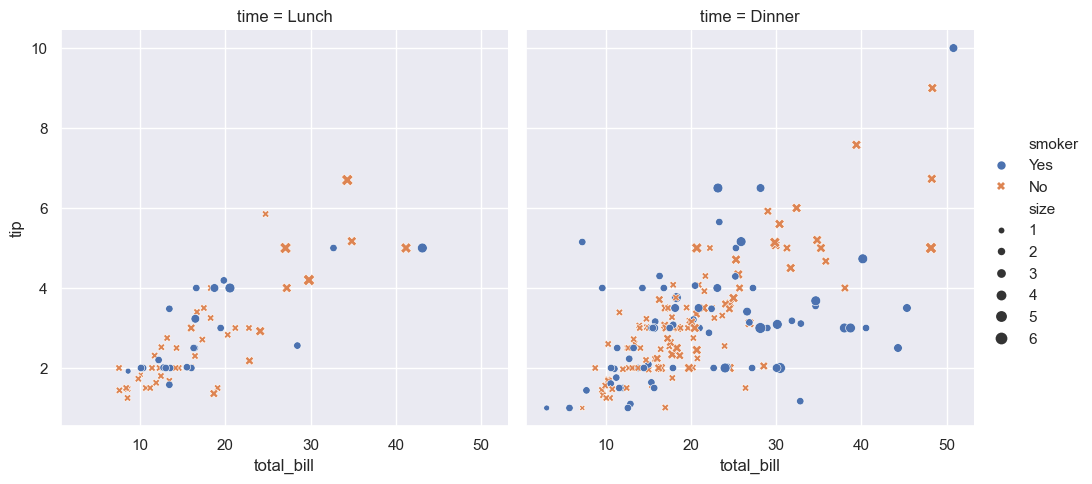

In [308]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    col="time", hue="smoker", style="smoker",
    size="size"
)
plt.savefig("data/tips_plot.png")

In [ ]:
dots = sns.load_dataset("dots")
dots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.3+ KB


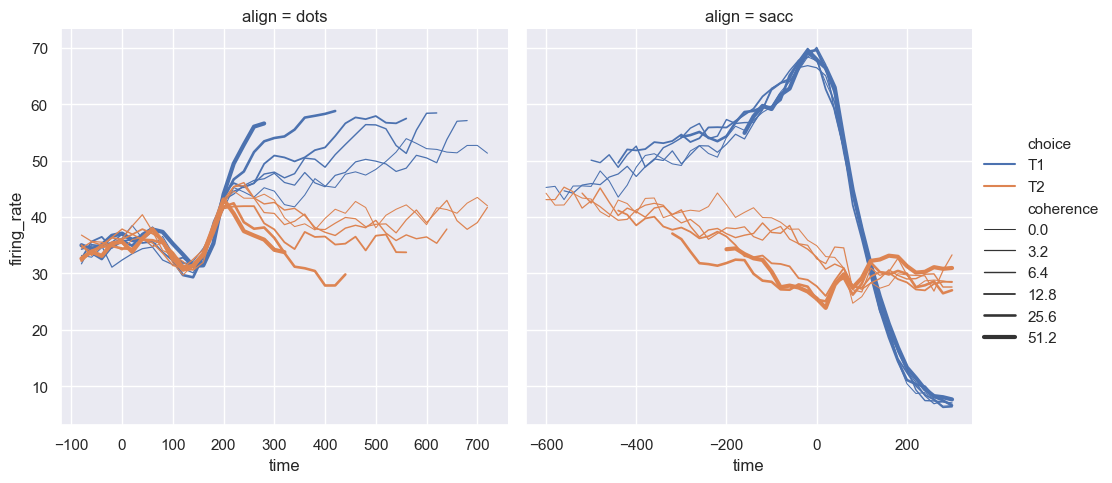

In [ ]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    col="align", hue="choice", size="coherence",
    facet_kws=dict(sharex=False)
)
plt.savefig("data/dots_plot.png")

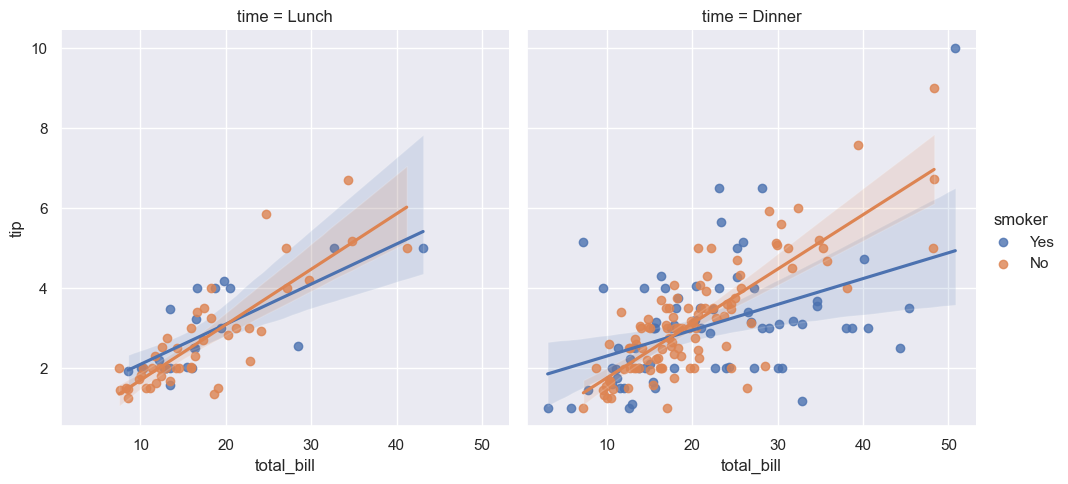

In [ ]:
sns.lmplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="smoker"
)
plt.savefig("data/tip_lm.png")

<Axes: xlabel='total_bill', ylabel='tip'>

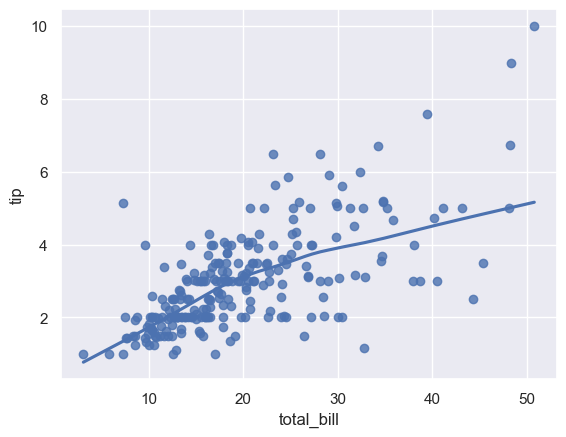

In [ ]:
sns.regplot(
    data=tips, x="total_bill", y="tip",
    lowess=True
)

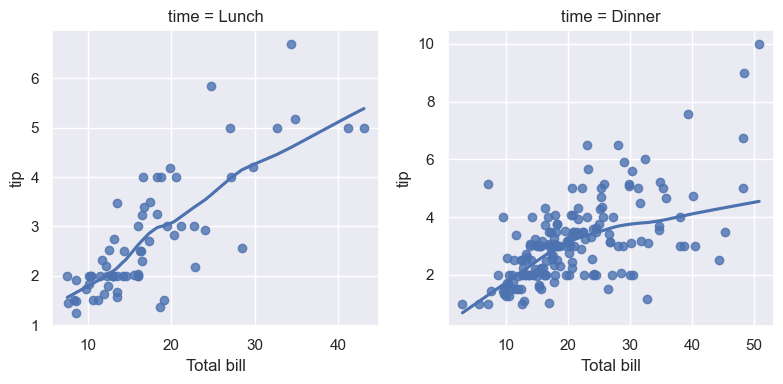

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
for i, time in enumerate(['Lunch', 'Dinner']):
    subset = tips[tips["time"] == time]
    sns.regplot(
        data=subset, x="total_bill", y="tip",
        lowess=True,
        ax=axes[i]
    )
    axes[i].set_title(f"time = {time}")
    axes[i].set_xlabel("Total bill")
plt.tight_layout()
plt.savefig("data/tips_lowess.png")


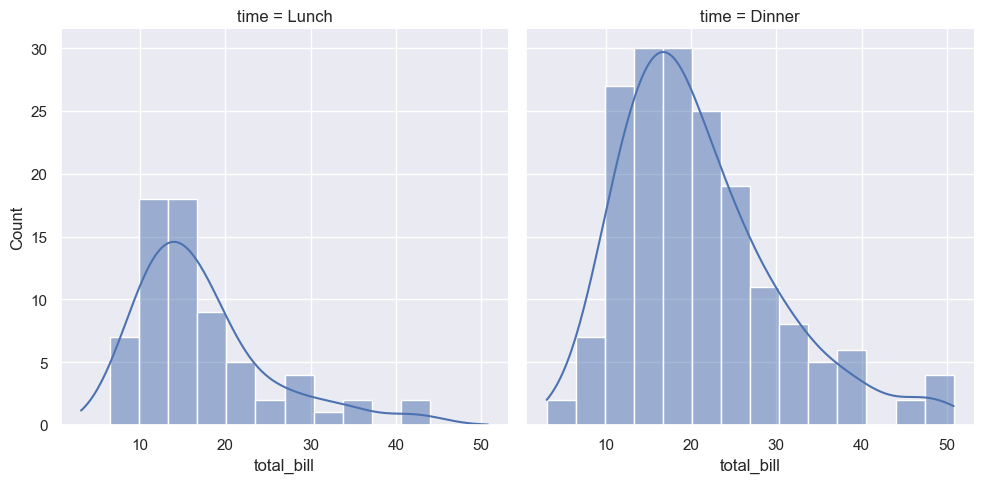

In [ ]:
sns.displot(
    data=tips,
    x="total_bill", col="time",
    kde=True
)
plt.savefig("data/tips_dist.png")

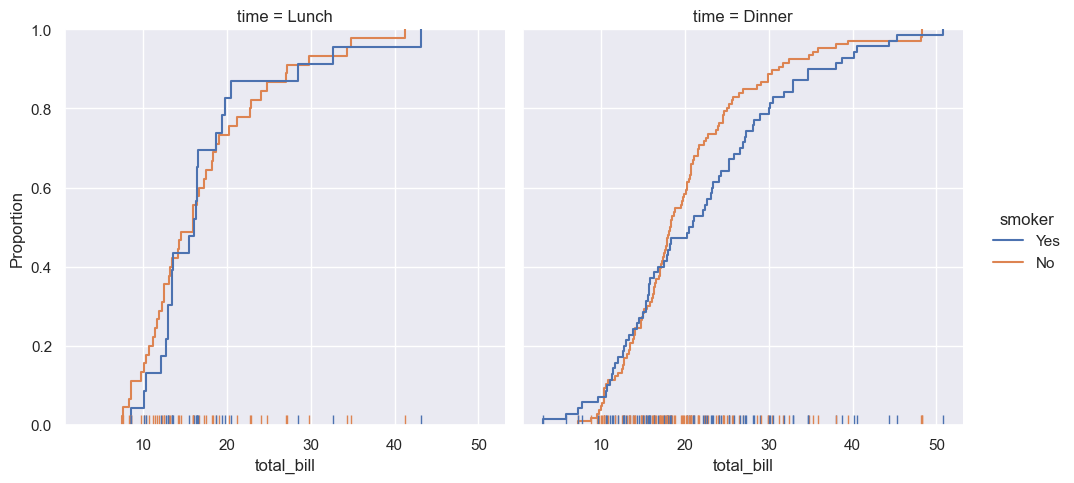

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill",
            col="time", hue="smoker", rug=True)
plt.savefig("data/tips_dis2.png")

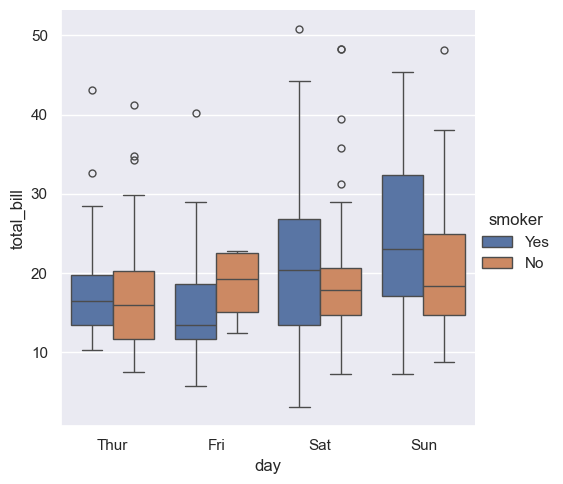

In [ ]:
sns.catplot(data=tips, kind="box", x="day", y="total_bill",
            hue="smoker", showfliers=True)
plt.savefig("data/tips_catbox.png")

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


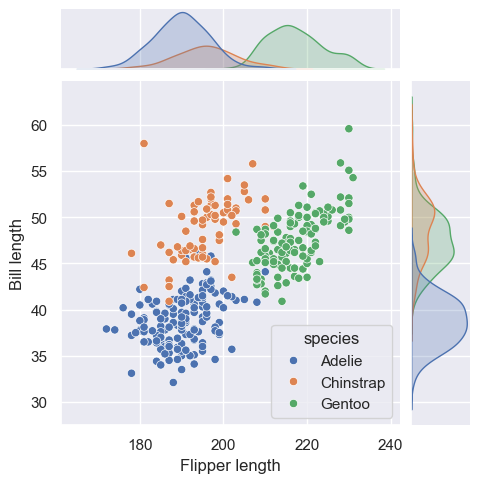

In [ ]:

graph = sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm",
              hue="species", height=5) # height sets the height of the plot
graph.set_axis_labels("Flipper length", "Bill length")
plt.savefig("data/penguins_sca.png")

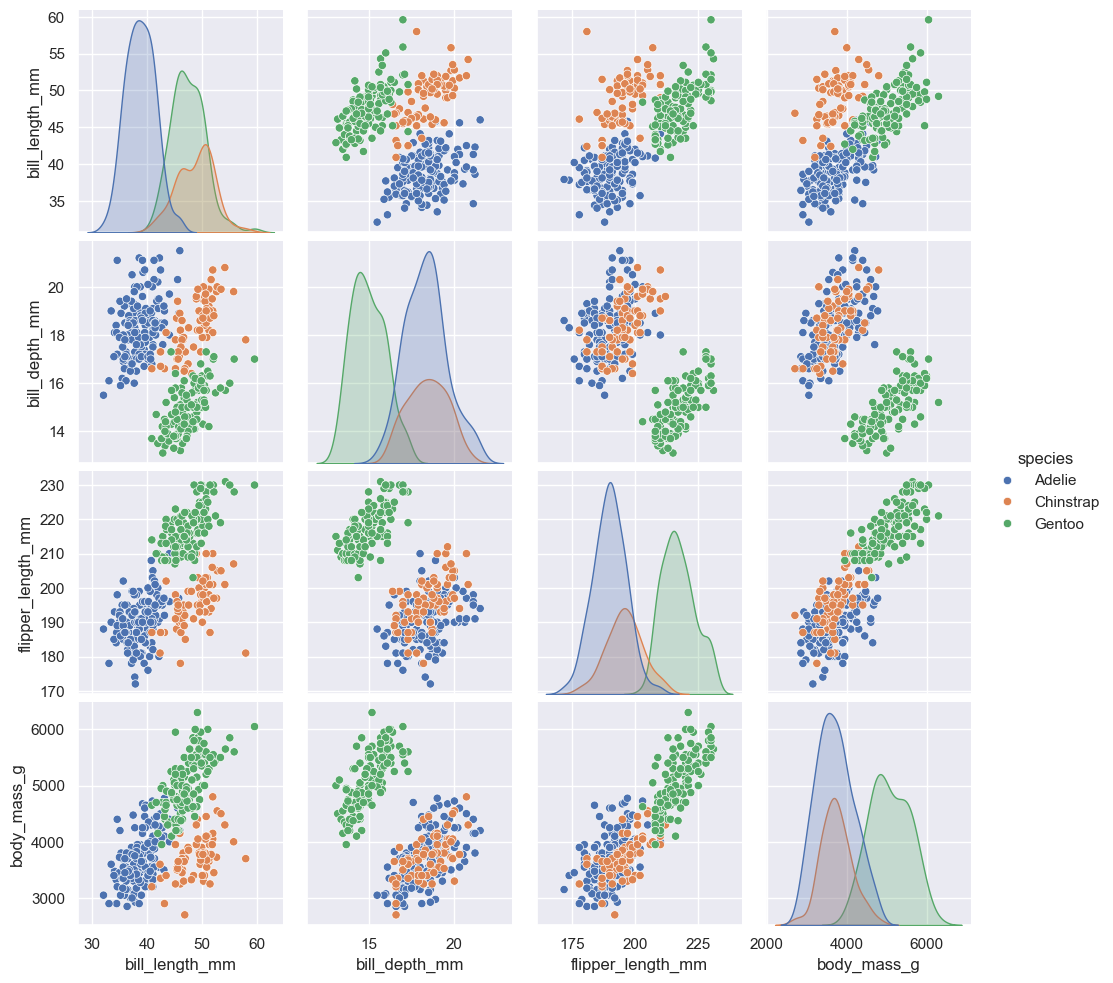

In [ ]:
sns.pairplot(data=penguins, hue="species")
plt.savefig("data/penguins_pairs.png")

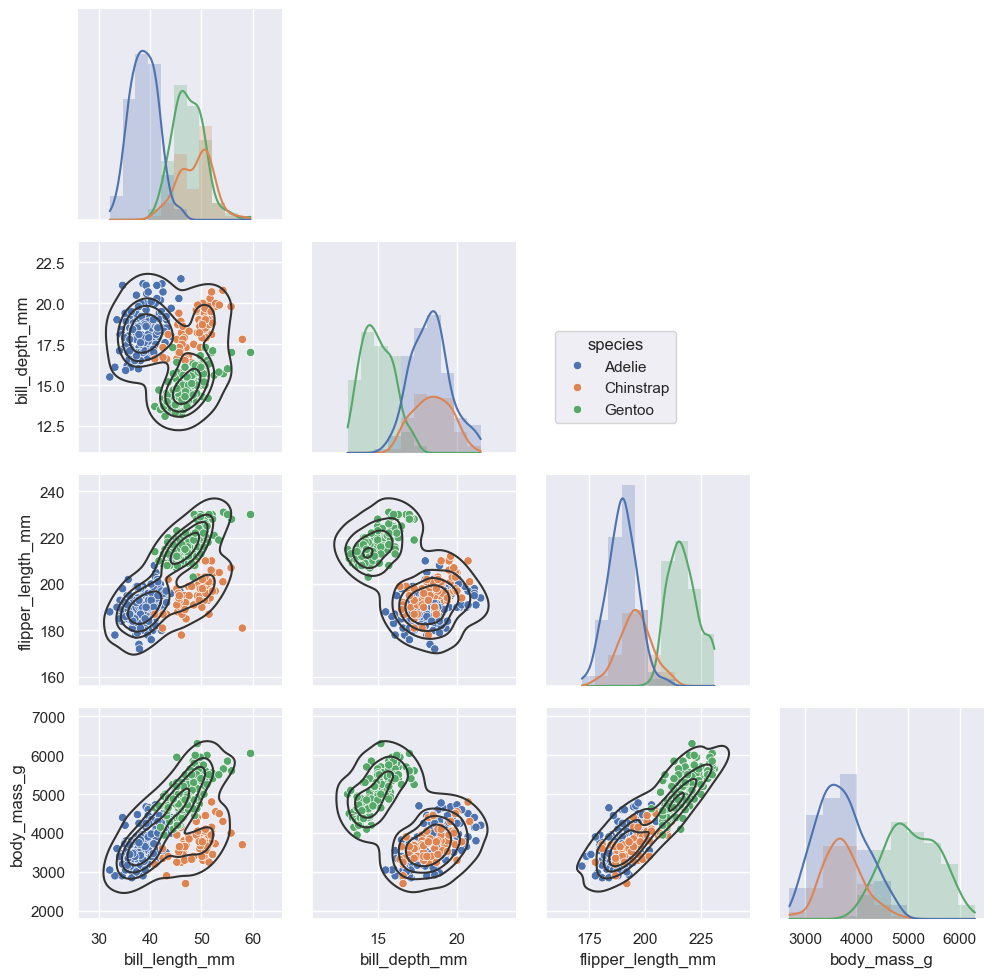

In [ ]:
# Set up pair grid, color separate by species, lower corner only
g = sns.PairGrid(penguins, hue="species", corner=True)
# Apply function to lower triagnle only—kernel density contours, not color seperation
# 5 contour levels, dark gray color
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
# Add scatterplot, inherits hue="species"
g.map_lower(sns.scatterplot)
# Add histogram to diagonal; element->no filled bars; linewidth->no line
# kde=True->overlay kernel density
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
# Add legend
g.add_legend(frameon=True)
# Position the legend
g.legend.set_bbox_to_anchor((.61, .6))
plt.savefig("data/penguins_complex.png")


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins2 = penguins["body_mass_g"]

<Axes: ylabel='body_mass_g'>

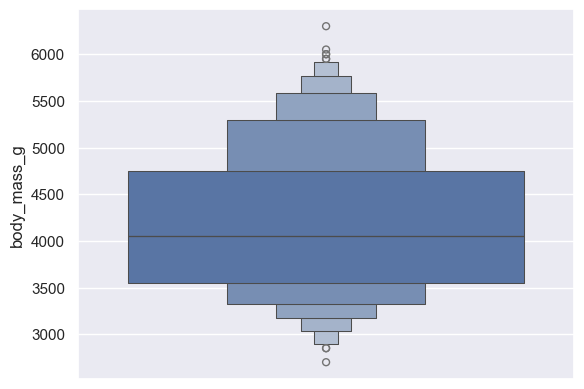

In [ ]:
sns.boxenplot(penguins2)

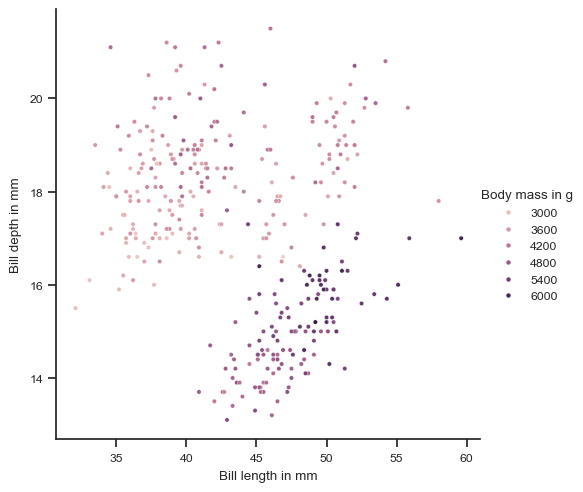

In [ ]:
sns.set_theme(style="ticks", font_scale=0.8)
g = sns.relplot(penguins,
            x="bill_length_mm", y="bill_depth_mm",
            hue="body_mass_g", s=10)
# labelpad specifies how much space betwen label and axis
g.set_axis_labels("Bill length in mm", "Bill depth in mm", labelpad=5)
leg = g._legend # internal handle created by seaborn
leg.set_title("Body mass in g")
plt.savefig("data/penguins_cus.png")

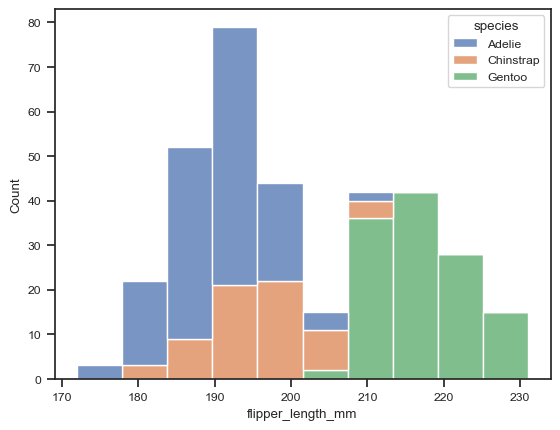

In [ ]:
sns.histplot(penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.savefig("data/penguins_hist.png")

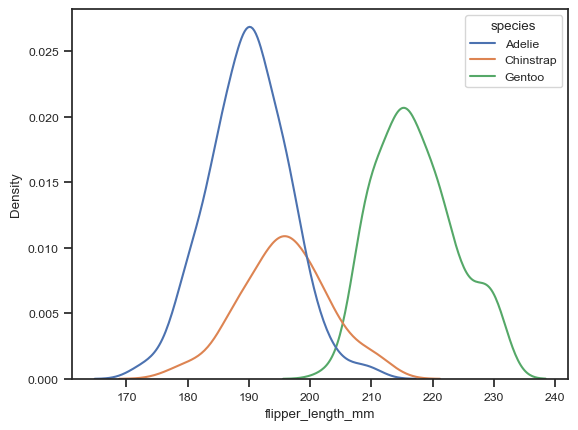

In [ ]:
sns.kdeplot(penguins, x="flipper_length_mm", hue="species")
plt.savefig("data/penguins_kde.png")

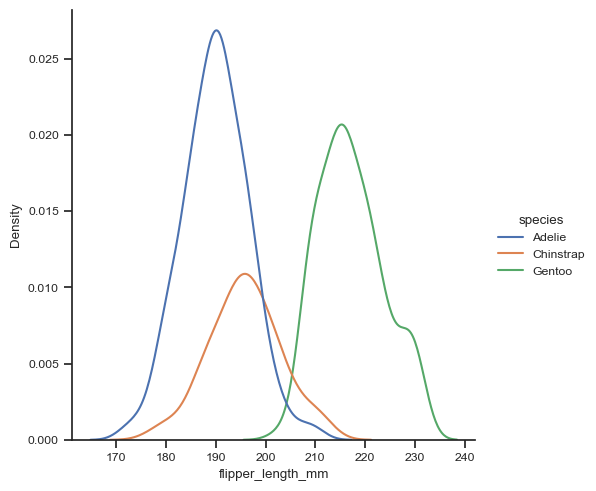

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")
plt.savefig("data/penguins_kde2.png")

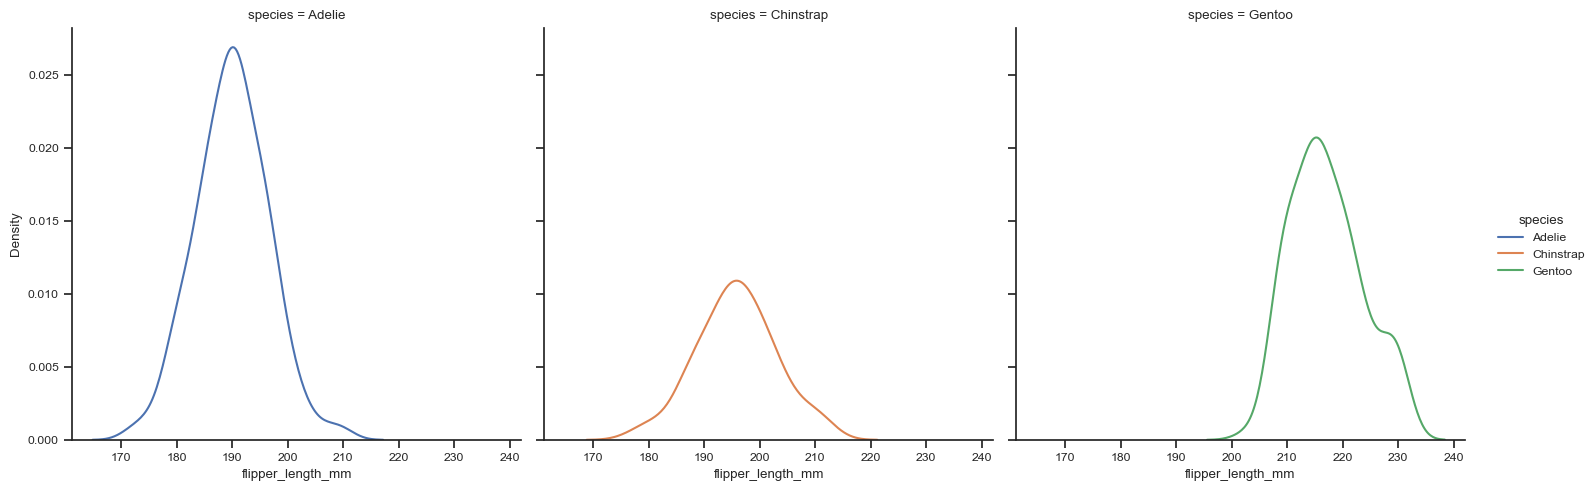

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", col="species", kind="kde")
plt.savefig("data/penguins_kde3")

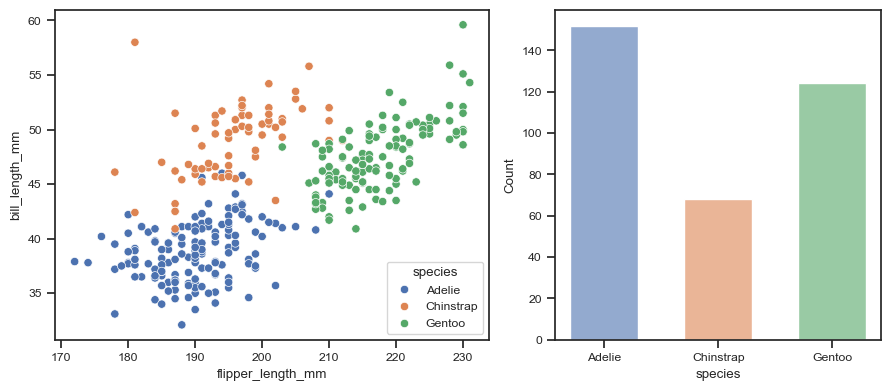

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9,4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axes[0])
sns.histplot(penguins, x="species", hue="species", shrink=0.6, alpha=0.6, legend=False, ax=axes[1])
fig.tight_layout()
plt.savefig("data/penguins_2plt.png")

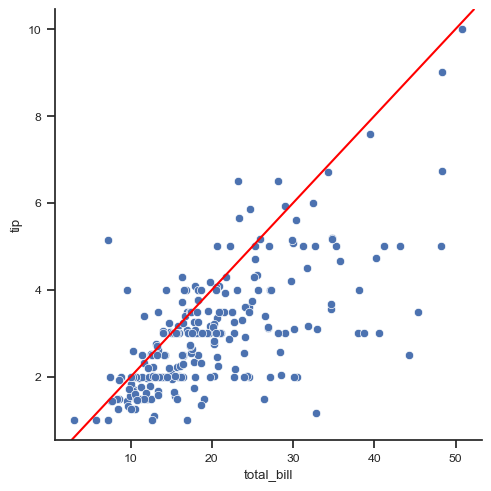

In [ ]:
g = sns.relplot(tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=0.2, color="red")

<Axes: xlabel='total_bill', ylabel='tip'>

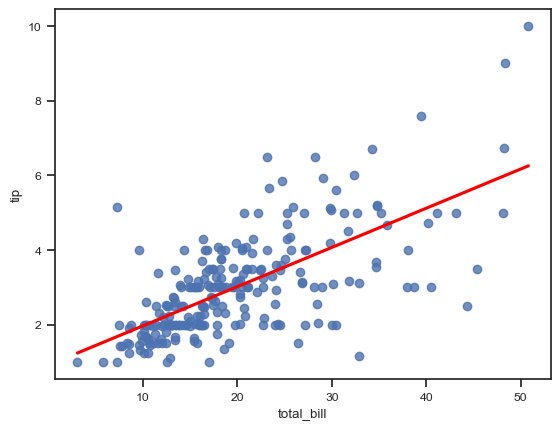

In [ ]:
sns.regplot(tips, x="total_bill", y="tip", line_kws={"color": "red"}, ci=None)

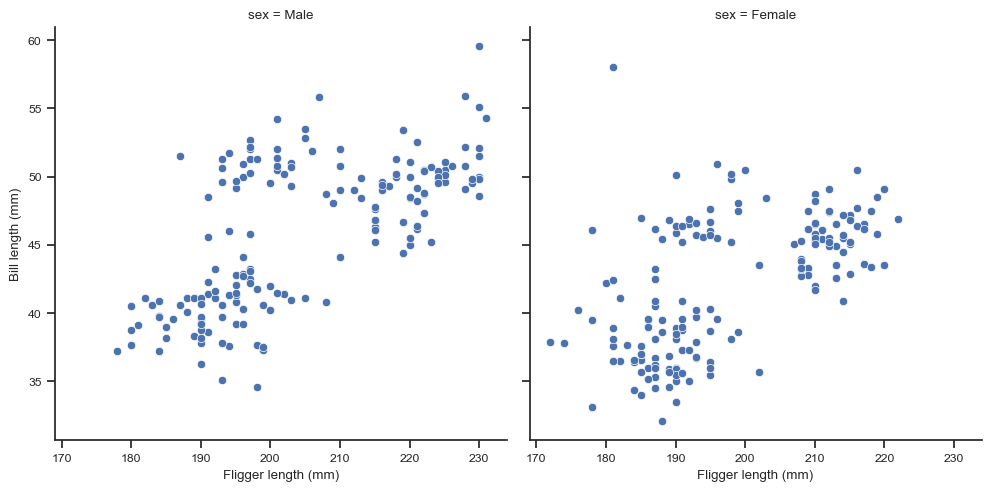

In [ ]:
g = sns.relplot(penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Fligger length (mm)", "Bill length (mm)")

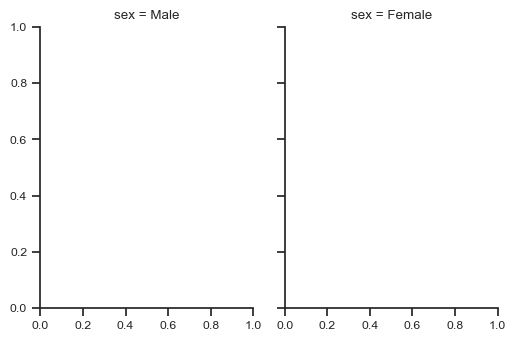

In [ ]:
sns.FacetGrid(penguins, col="sex", height=3.5, aspect=0.75)

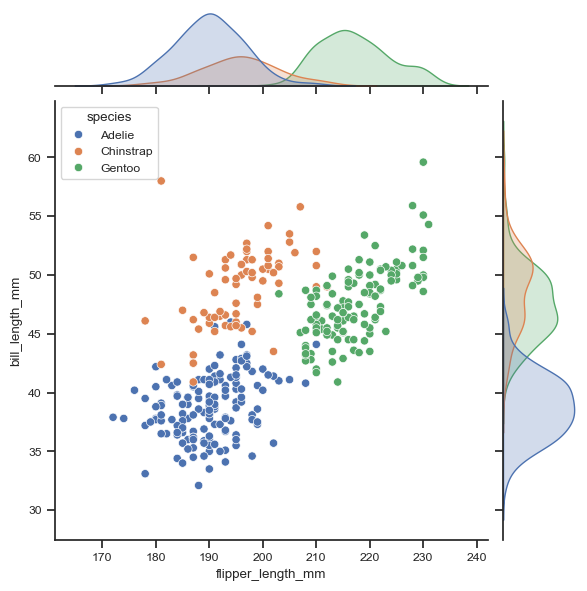

In [ ]:
sns.jointplot(penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

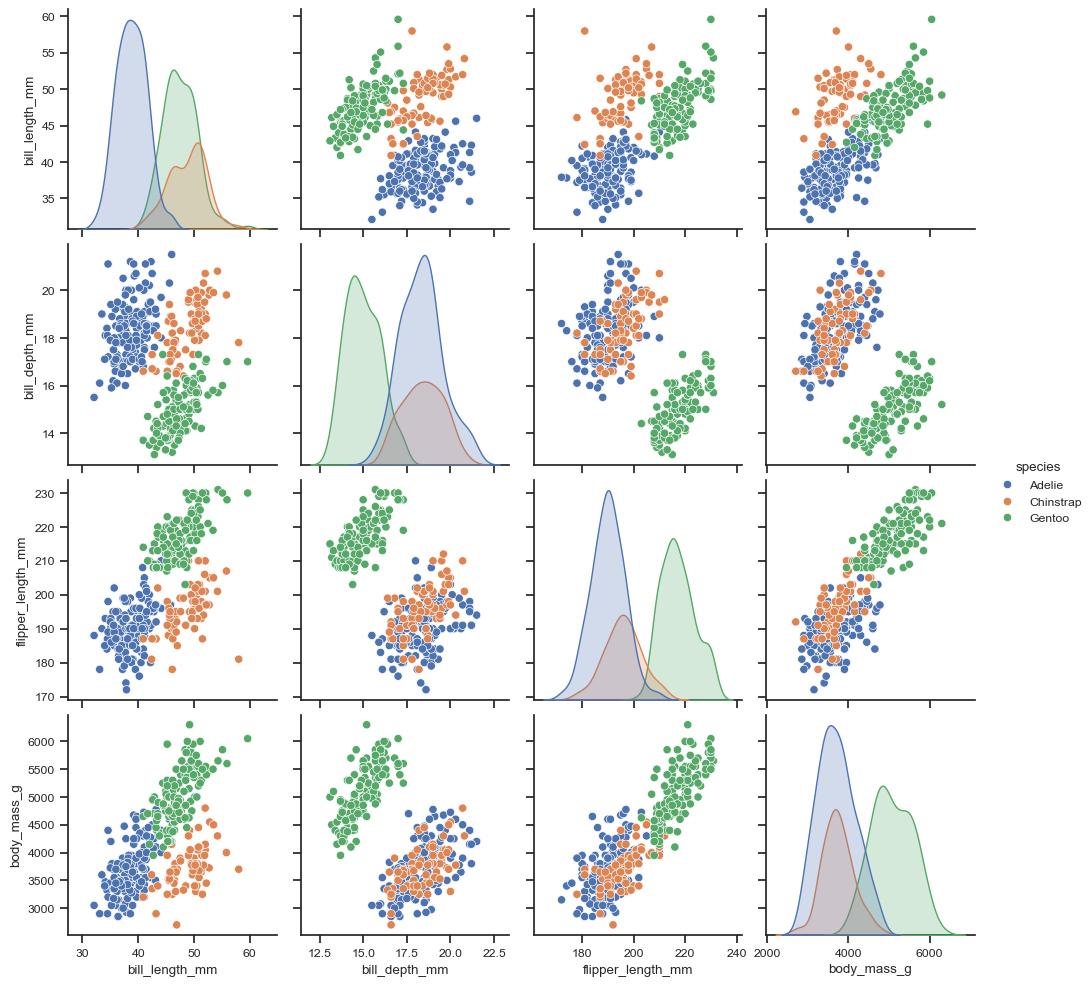

In [ ]:
sns.pairplot(penguins, hue="species")

In [ ]:
flights = sns.load_dataset("flights")
flights.sample(5).sort_index()

,year,month,passengers
22,1950,Nov,114
43,1952,Aug,242
74,1955,Mar,267
84,1956,Jan,284
132,1960,Jan,417


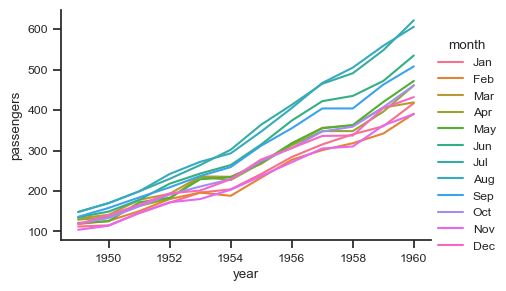

In [ ]:
sns.relplot(flights, x="year", y="passengers", hue="month", kind="line", height=3, aspect=1.5)
plt.savefig("data/flights_long_line.png")

In [ ]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head(3)

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166


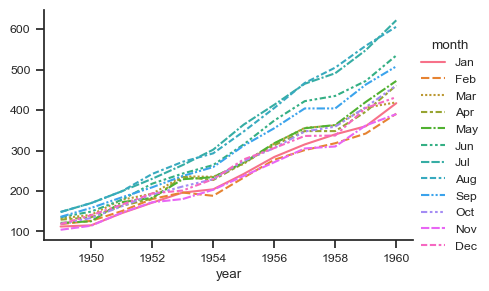

In [ ]:
sns.relplot(flights_wide, kind="line", height=3, aspect=1.5)
plt.savefig("data/flights_wide_line.png")

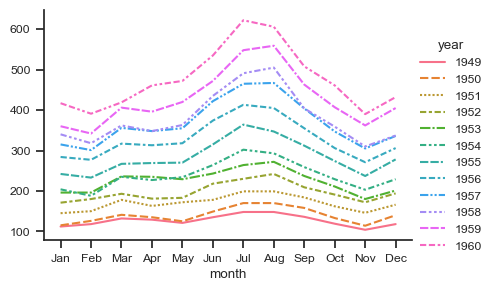

In [ ]:
sns.relplot(flights_wide.T, kind="line", height=3, aspect=1.5)
plt.savefig("data/flights_wide_line2.png")

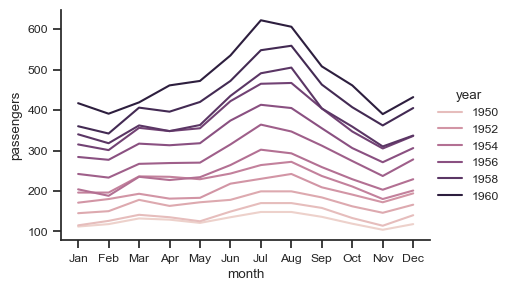

In [ ]:
sns.relplot(flights, x="month", y="passengers", hue="year", kind="line", height=3, aspect=1.5)

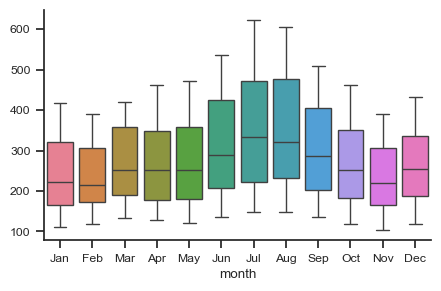

In [ ]:
sns.catplot(flights_wide, kind="box", height=3, aspect=1.5)
plt.savefig("data/flight_wide_box.png")

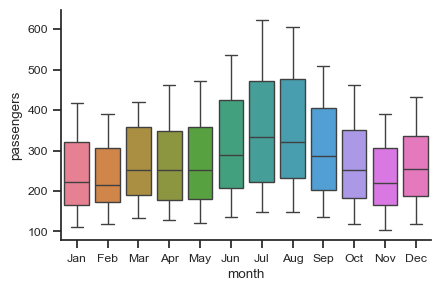

In [ ]:
sns.catplot(flights, x="month", y="passengers", hue="month", kind="box", height=3, aspect=1.5)

In [ ]:
# An example of messy data
anagrams = sns.load_dataset("anagrams")
anagrams.describe()

,subidr,num1,num2,num3
count,20.00000,20.000000,20.00000,20.000000
mean,10.50000,5.350000,5.97500,6.550000
std,5.91608,1.843195,1.67391,1.099043
min,1.00000,2.000000,3.00000,5.000000
25%,5.75000,4.750000,5.00000,6.000000
50%,10.50000,5.500000,5.50000,6.000000
75%,15.25000,6.250000,7.25000,7.000000
max,20.00000,8.000000,9.00000,9.000000


In [ ]:
anagrams_long = anagrams.melt(id_vars=['subidr', 'attnr'], var_name='solutions', value_name='score')
anagrams_long.describe()
anagrams_long[anagrams_long['subidr'] == 12]

,subidr,attnr,solutions,score
11,12,focused,num1,8.0
31,12,focused,num2,9.0
51,12,focused,num3,8.0


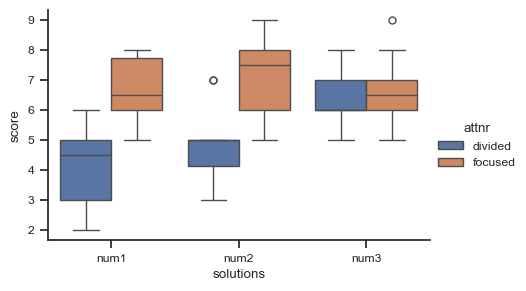

In [ ]:
sns.catplot(anagrams_long, x="solutions", y="score", hue="attnr", kind="box", height=3, aspect=1.5)
plt.savefig("data/anagrams_box.png")

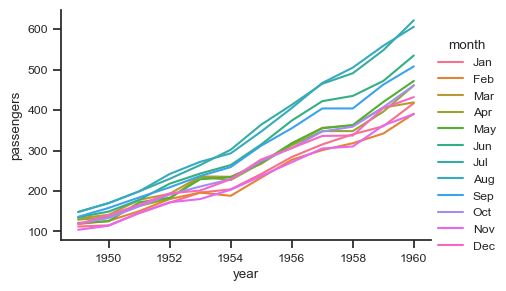

In [ ]:
flights_dict = flights.to_dict()
sns.relplot(flights_dict, x="year", y="passengers", hue="month", kind="line", height=3, aspect=1.5)

<Axes: xlabel='year'>

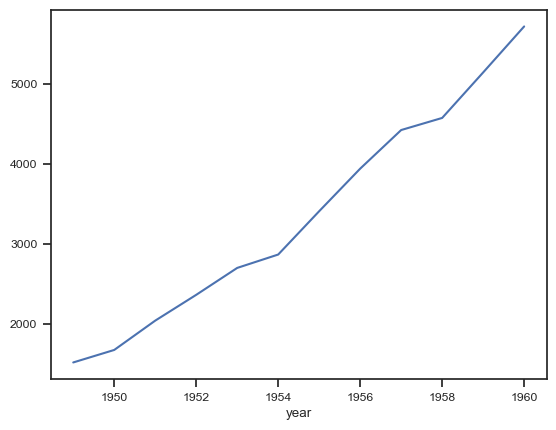

In [ ]:
flights.head()
flights.groupby("year")["passengers"].sum().plot()

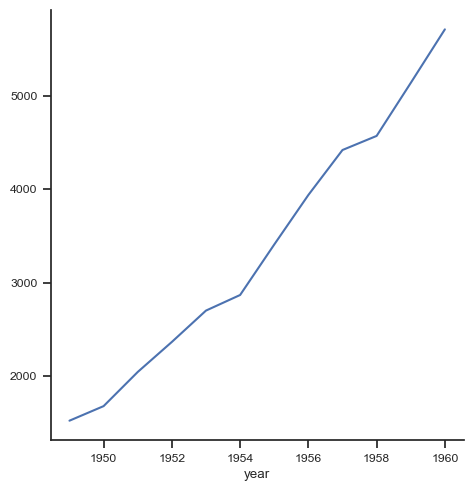

In [ ]:
flights_sum = flights.groupby("year")["passengers"].sum()
sns.relplot(x = flights_sum.index, y = flights_sum.values, kind="line")

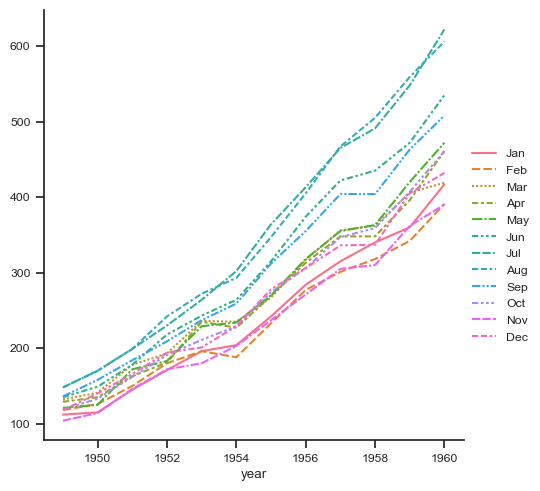

In [ ]:
# transform DataFrame into list
# _, col->col_name, and col_array
flights_wide_list = [col for _, col in flights_wide.items()]
len(flights_wide_list)
sns.relplot(flights_wide_list, kind="line")

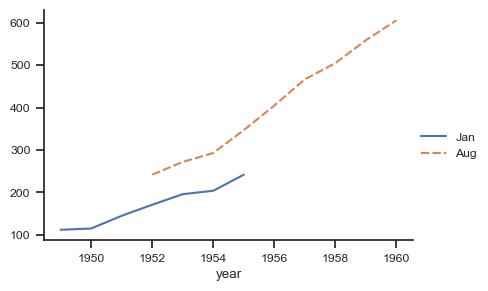

In [ ]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(two_series, kind="line", height=3, aspect=1.5)
plt.savefig("data/flights_two_series.png")

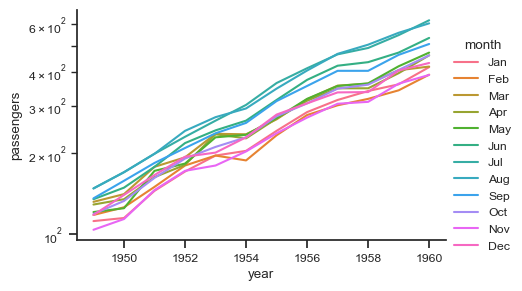

In [ ]:
sns.relplot(flights, x="year", y="passengers", hue="month", kind="line", height=3, aspect=1.5)
# plt.ylim(0, 700) # setting the min and max on the y-axis
plt.yscale('log')

In [ ]:
sns.set_theme()

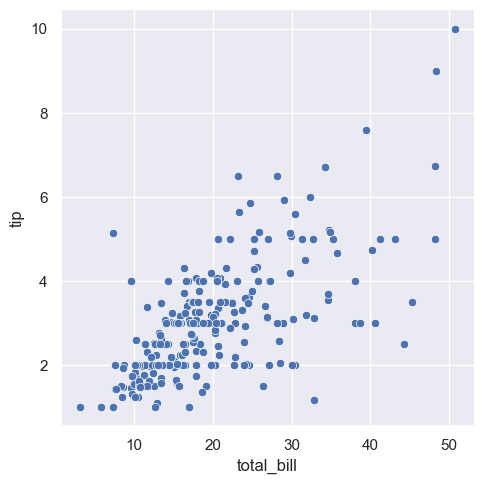

In [ ]:
sns.relplot(tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

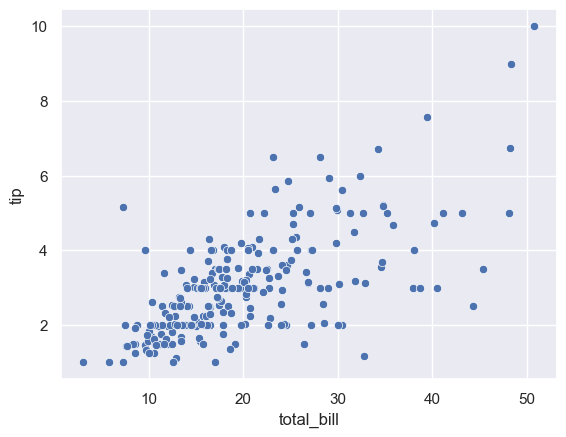

In [ ]:
sns.scatterplot(tips, x="total_bill", y="tip")

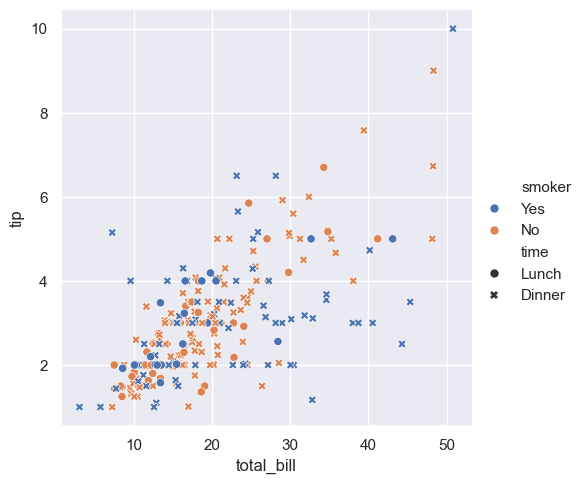

In [ ]:
sns.relplot(tips, x="total_bill", y="tip",
            hue="smoker", style="time")
plt.savefig("data/tips_scatter.png")

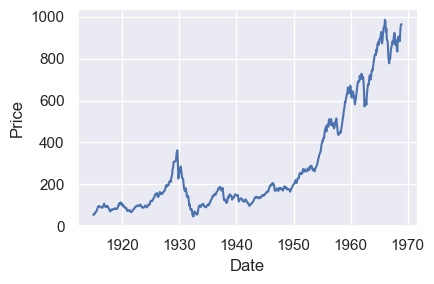

In [ ]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(dowjones, x="Date", y="Price", kind="line", height=3, aspect=1.5)
plt.savefig("data/dowjones_line.png")

In [ ]:
fmri = sns.load_dataset("fmri")
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [ ]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [ ]:
fmri[fmri["timepoint"] == 12]

,subject,timepoint,event,region,signal
85,s13,12,stim,parietal,-0.100984
86,s12,12,stim,parietal,-0.052295
87,s11,12,stim,parietal,-0.178510
88,s10,12,stim,parietal,-0.087232
89,s9,12,stim,parietal,-0.097789
90,s8,12,stim,parietal,-0.092511
91,s7,12,stim,parietal,-0.040385
92,s6,12,stim,parietal,-0.150693
93,s5,12,stim,parietal,-0.110496
94,s4,12,stim,parietal,-0.090036


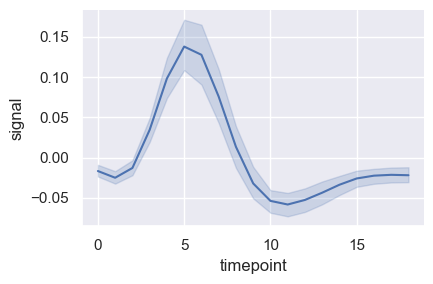

In [ ]:
sns.relplot(fmri, x="timepoint", y="signal", kind="line", height=3, aspect=1.5)
plt.savefig("data/fmri_line.png")

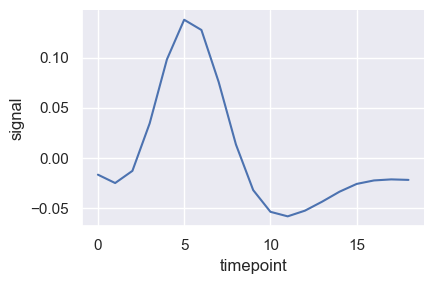

In [ ]:
sns.relplot(fmri, x="timepoint", y="signal", kind="line", height=3, aspect=1.5, errorbar=None)

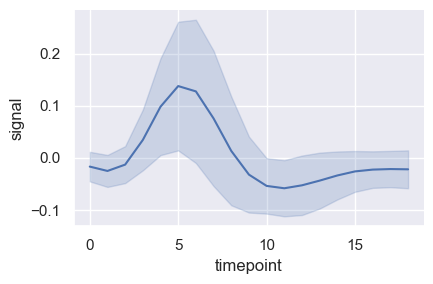

In [ ]:
sns.relplot(fmri, x="timepoint", y="signal", kind="line", height=3, aspect=1.5, errorbar="sd")

In [ ]:
fmri['event'].value_counts()

event
stim    532
cue     532
Name: count, dtype: int64

In [ ]:
fmri[fmri["timepoint"] == 12]['event'].value_counts()

event
stim    28
cue     28
Name: count, dtype: int64

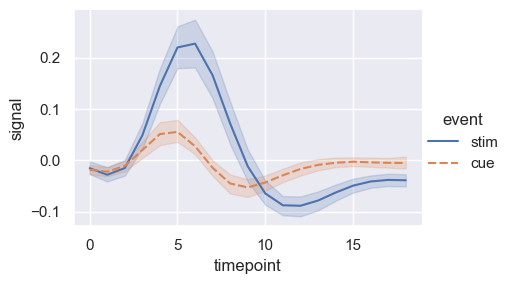

In [ ]:
sns.relplot(fmri, x="timepoint", y="signal", hue="event", style='event', kind="line", height=3, aspect=1.5)

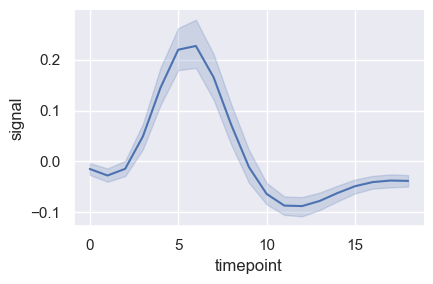

In [ ]:
sns.relplot(fmri.query('event == "stim"'), x="timepoint", y="signal", kind="line", 
            height=3, aspect=1.5)

In [ ]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


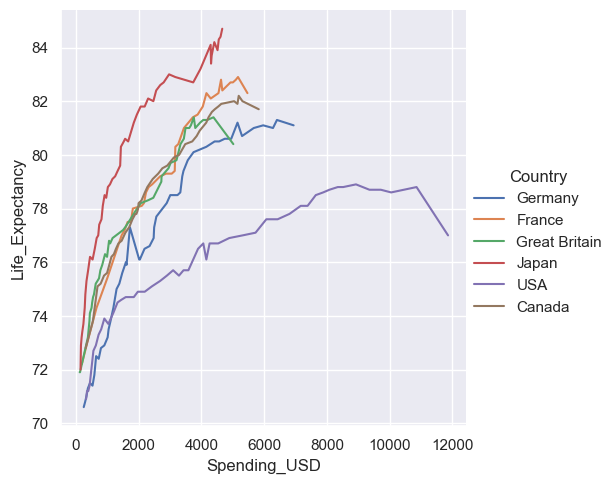

In [ ]:
sns.relplot(healthexp, x="Spending_USD", y="Life_Expectancy",
            hue="Country", kind="line")

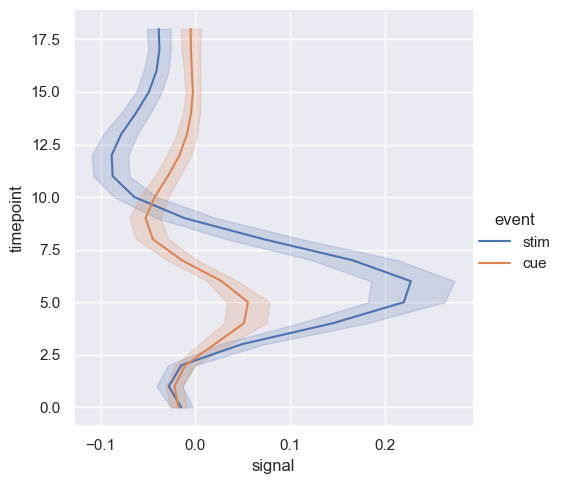

In [ ]:
sns.relplot(fmri, kind="line",
            x="signal", y="timepoint", hue="event",
            orient="y")
plt.savefig("data/fmri_rev.png")

In [ ]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


OSError: [Errno 22] Invalid argument: 'data/fmri_grid.png'

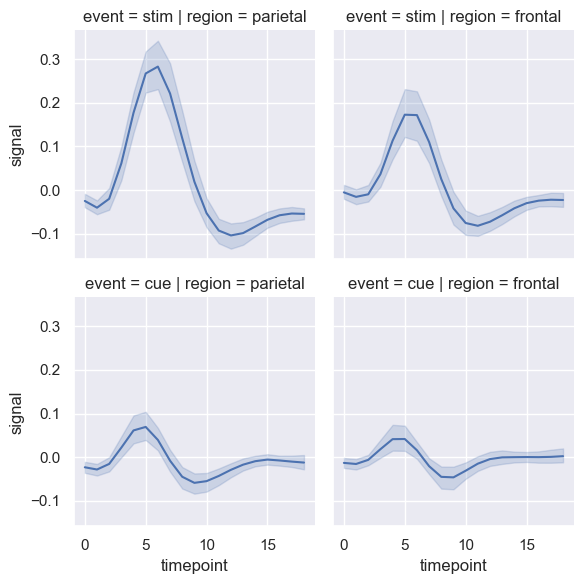

In [ ]:
sns.relplot(fmri, kind="line", x="timepoint", y="signal",
            row="event", col="region", height=3)
plt.savefig("data/fmri_grid.png")